#### Name - Aakash Jain.
#### Roll No. - 222010019.
#### Subject - Deep Learning Laboratory.
#### Lab 04 - Implement a multi-layer perceptron network with Binary Input and Output for the XOR function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
)

In [3]:
target_xor = np.array(
    [
        [0],
        [1],
        [1],
        [0]
    ]
)

#### Create a multi-layer perceptron.  
* train_data: A 4x2 matrix with the input data.  
* target: A 4x1 matrix with expected outputs  
* lr: the learning rate. Defaults to 0.1  
* num_epochs: the number of times the training data goes through the model
while training  
* num_input: the number of nodes in the input layer of the MLP.  
Should be equal to the second dimension of train_data.  

* num_hidden: the number of nodes in the hidden layer of the MLP.  
* num_output: the number of nodes in the output layer of the MLP.  
Should be equal to the second dimension of target.  

In [22]:
class MLP:
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        # initialize both sets of weights and biases randomly
            # - weights_01: weights between input and hidden layer
            # - weights_12: weights between hidden and output layer
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        # - b01: biases for the  hidden layer
        # - b12: bias for the output layer
        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.b12 = np.random.uniform(size=(1,num_output))

        self.losses = []

    def update_weights(self):
        
        # Calculate the squared error
        loss = 0.5 * (self.target - self.output_final) ** 2
        error_term = (self.target - self.output_final)

        # the gradient for the hidden layer weights
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))

        # the gradient for the output layer weights
        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))

        # updating the weights by the learning rate times their gradient
        self.weights_01 += self.lr * grad01
        self.weights_12 += self.lr * grad12

        # update the biases the same way
        self.b01 += np.sum(self.lr * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.b12 += np.sum(self.lr * error_term * self._delsigmoid(self.output_final), axis=0)

    def _sigmoid(self, x):
        """
        The sigmoid activation function.
        """
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        """
        The first derivative of the sigmoid function wrt x
        """
        return x * (1 - x)

    def forward(self, batch):
        """
        A single forward pass through the network.
        Implementation of wX + b
        """

        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):
        """
        Train an MLP. Runs through the data num_epochs number of times.
        A forward pass is done first, followed by a backward pass (backpropagation)
        where the networks parameter's are updated.
        """
        for _ in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()

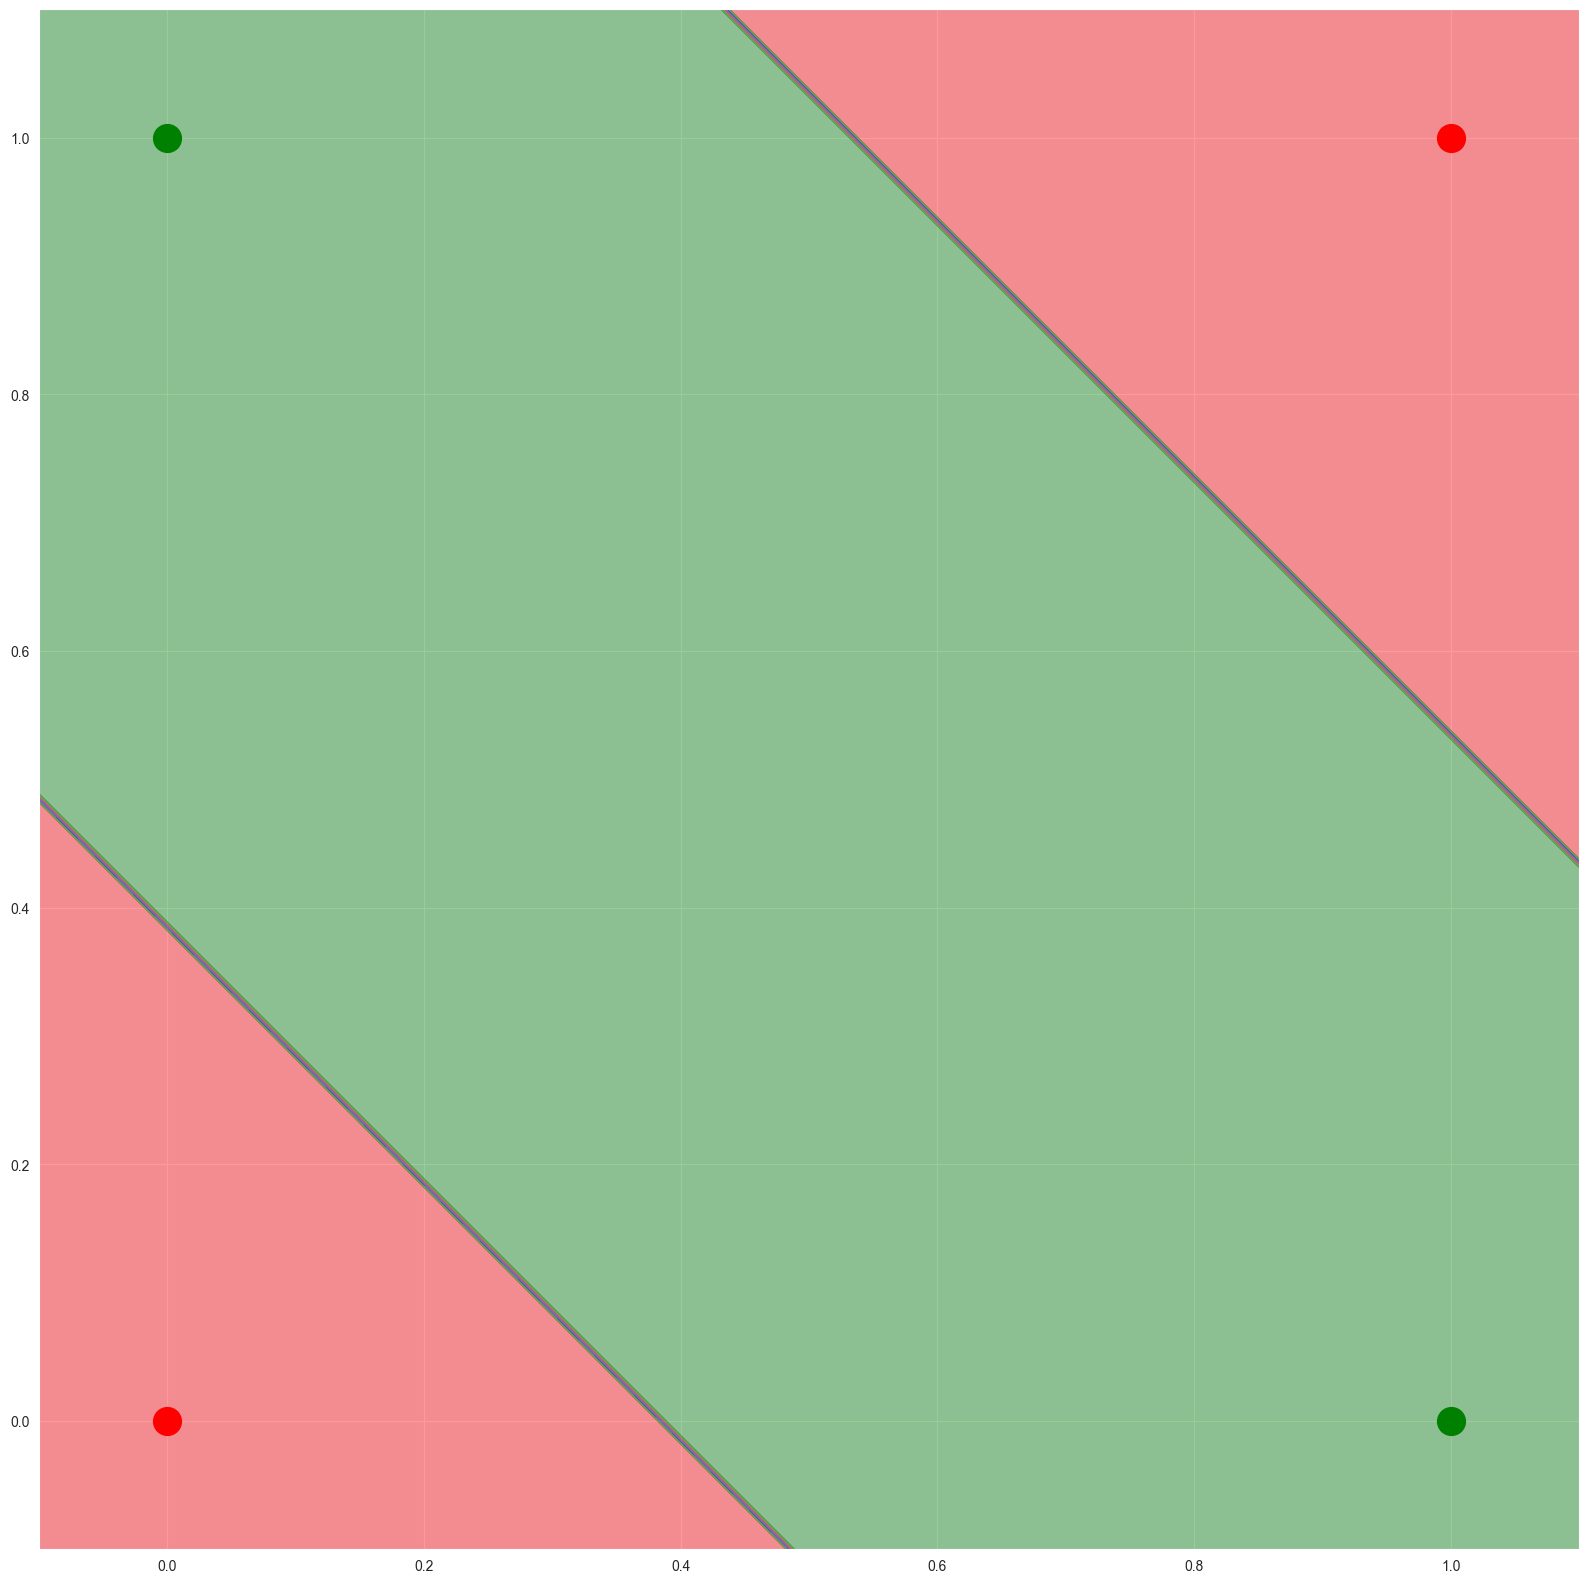

In [23]:
mlp = MLP(train_data, target_xor, 0.2, 5000)
mlp.train()
mlp.plot()

#### As we can see, after 5000 epochs, the model has converged. A clear non-linear decision boundary is created here with our generalized neural network, or MLP.